In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = 'C:\programming\entsoe-data'

This will import the data, you have to run it to be able to solve the homework.

In [2]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [3]:
countries=power_demand["AreaName"].isin(["Austria", "Germany", "United Kingdom", "Spain", "Sweden", "Italy", "Croatia"])
selected_time=power_demand["Year"].isin([2015,2016,2017,2018,2019])

In [4]:
power_demand_selected=power_demand[countries & selected_time]
power_demand_selected

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2015-01-01 00:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6017.2,2017-09-14 04:00:15
2015-01-01 00:15:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5966.8,2017-09-14 04:00:15
2015-01-01 00:30:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5935.6,2017-09-14 04:00:15
2015-01-01 00:45:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5934.4,2017-09-14 04:00:15
2015-01-01 01:00:00,2015,1,1,PT15M,10YAT-APG------L,CTY,Austria,AT,5750.8,2017-09-14 04:00:15
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,34772.0,2020-01-06 22:16:17
2019-12-31 22:00:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,32305.0,2020-01-06 22:16:17
2019-12-31 22:30:00,2019,12,31,PT30M,GB,CTY,United Kingdom,GB,31521.0,2020-01-06 22:16:17


In [5]:
def wednesday_sunday_relation(*countries):
    ratio_list=[]
    country_ratio={}
    
    for country in countries:
        power_demand_selected_c=power_demand_selected[power_demand_selected["AreaName"]==country]
        power_demand_grouped_c = power_demand_selected_c.groupby(power_demand_selected_c.index.weekday).mean()
        ratio=power_demand_grouped_c.loc[2][3]/power_demand_grouped_c.loc[6][3]
        country_ratio[ratio]=country
        ratio_list.append(ratio)
    print(f"wednesday- sunday- ratio: {country_ratio}")
    max_value=max(ratio_list)
    print(f"{country_ratio[max_value]} has the highest Wednesday- Sunday ratio. The value is: {max_value}")
    return max_value
    
    

In [6]:
wednesday_sunday_relation("Austria","Germany", "Spain", "Sweden","Italy", "United Kingdom", "Croatia")

wednesday- sunday- ratio: {1.2699300382093988: 'Austria', 1.2984684924675223: 'Germany', 1.2112472535692624: 'Spain', 1.117264750947256: 'Sweden', 1.3762369971752841: 'Italy', 1.1332241058074153: 'United Kingdom', 1.1498820059246304: 'Croatia'}
Italy has the highest Wednesday- Sunday ratio. The value is: 1.3762369971752841


1.3762369971752841

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


In [7]:
mean_tlv = power_demand_selected.groupby(["AreaName", power_demand_selected.index.month]).mean()["TotalLoadValue"]
mean_tlv

AreaName        DateTime
Austria         1            7932.530645
                2            8040.209013
                3            7574.834328
                4            6796.085833
                5            6483.764677
                                ...     
United Kingdom  8           32546.694217
                9           33385.264254
                10          35639.424453
                11          39330.550889
                12          38694.120942
Name: TotalLoadValue, Length: 84, dtype: float64

In [8]:
average_tlv = power_demand_selected.groupby(["AreaName"]).mean()["TotalLoadValue"]
average_tlv

AreaName
Austria            7124.438760
Croatia            2003.858225
Germany           55859.257807
Italy             33192.450073
Spain             28664.970677
Sweden            15623.217001
United Kingdom    36318.162173
Name: TotalLoadValue, dtype: float64

In [9]:
result_ratio = mean_tlv/average_tlv

In [10]:
result_ratio.unstack()

DateTime,1,2,3,4,5,6,7,8,9,10,11,12
AreaName,,,,,,,,,,,,
Austria,1.113425,1.128539,1.063218,0.953912,0.910074,0.926077,0.916214,0.905685,0.942456,0.987381,1.075567,1.085772
Croatia,1.082719,1.063903,1.001216,0.918810,0.905044,0.958456,1.064057,1.052261,0.957277,0.935913,0.991125,1.069385
Germany,1.064554,1.074510,1.036265,0.966114,0.948962,0.963211,0.965244,0.947354,0.965235,0.995737,1.060383,1.017721
Italy,1.026697,1.049985,0.990605,0.910626,0.933483,1.026133,1.136398,0.959686,1.012885,0.970708,1.003899,0.981911
Spain,1.064727,1.066895,1.001202,0.941515,0.935340,0.995052,1.062301,1.009465,0.983747,0.942679,1.001410,0.999224
Sweden,1.274837,1.240632,1.139172,0.995361,0.875668,0.820553,0.757850,0.803023,0.865870,0.974757,1.113573,1.155836
United Kingdom,1.133772,1.158053,1.094719,0.996545,0.948103,0.915583,0.910248,0.896155,0.919244,0.981311,1.082944,1.065421


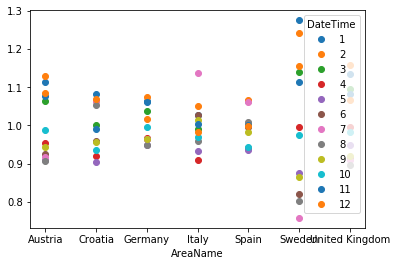

In [11]:
result_ratio.unstack().plot(style= 'o')

If the value is close to 1 it means that the value of the energy load is quite constant. Thus if the values are spread more widely, it means that each month is quite different from the average energy load. In Sweden the saisonality is probalby a factor that contributes to the difference in monthly energy consumption. This reflects for example the use of artificial light or how much energy is used to heat with electrical power. 

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

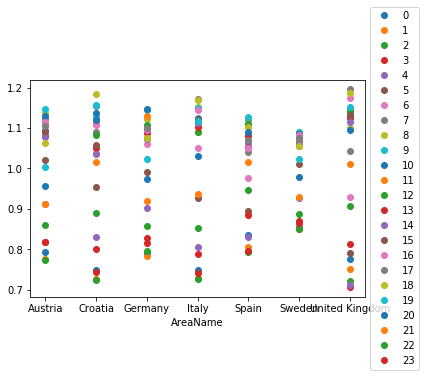

In [21]:


mean_tlv_hour = power_demand_selected.groupby(["AreaName", power_demand_selected.index.hour]).mean()["TotalLoadValue"]

average_tlv_hour = power_demand_selected.groupby(["AreaName"]).mean()["TotalLoadValue"]

result_ratio_hour = mean_tlv_hour/average_tlv_hour

result_ratio_hour.unstack().plot(style = 'o').legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))

The variability is highest in the United Kingdom and lowest in Sweden. Therefore, Sweden does not show as high differences in its electricity use over the day as the United Kingdom.

# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [13]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population

,Country,Population
Country,,
Austria,Austria,8840521
Croatia,Croatia,4087843
Germany,Germany,82905782
Italy,Italy,60421760
Spain,Spain,46796540
Sweden,Sweden,10175214
United Kingdom,United Kingdom,66460344


In [14]:
average_tlv = power_demand_selected.groupby(["AreaName"]).mean()["TotalLoadValue"]


In [15]:
result = average_tlv/population['Population']

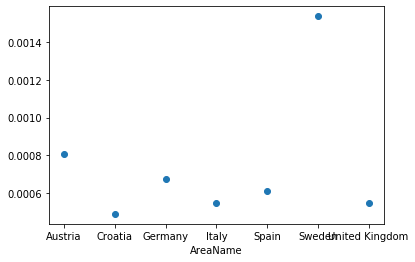

In [16]:
result.plot(style ='o')

Croatia has the lowest load and Sweden the hgihest. Sweden is a richer country and they have a lot of hydropower, thats why they use more electricity (for heating etc.). Furthermore it's darker there and colder in the winter. 

The value has the unit MWh. To convert it to MWh per year, we multiply it by 8760.